# Data Loading & Overview

In [3]:
import pandas as pd

df = pd.read_csv("../data/MachineLearningRating_v3.txt", delimiter="|")

df.head()


C:\Users\addis\AppData\Local\Temp\ipykernel_9936\962661601.py:3: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/MachineLearningRating_v3.txt", delimiter="|")


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


# Descriptive Statistics

In [4]:
# Summary stats for key numeric columns
df[['TotalPremium', 'TotalClaims', 'CustomValueEstimate']].describe()

df['LossRatio'] = df['TotalClaims'] / df['TotalPremium']
df['LossRatio'].mean()


c:\Users\addis\miniconda3\Lib\site-packages\numpy\_core\_methods.py:52: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


np.float64(nan)

# Data Quality Check

In [5]:
# Missing values
df.isnull().sum()[df.isnull().sum() > 0]

# Check data types
df.dtypes


UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOfDoors               

# Univariate Analysis

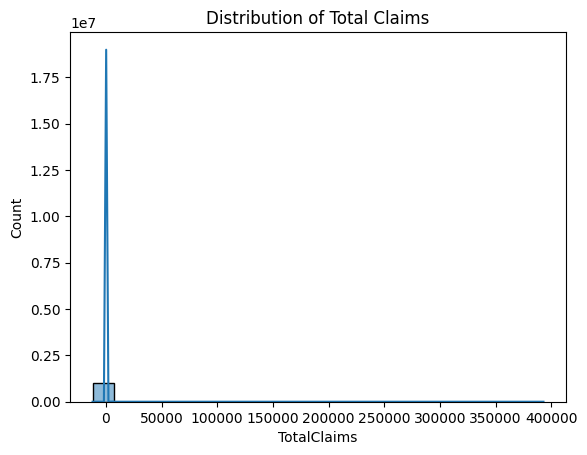

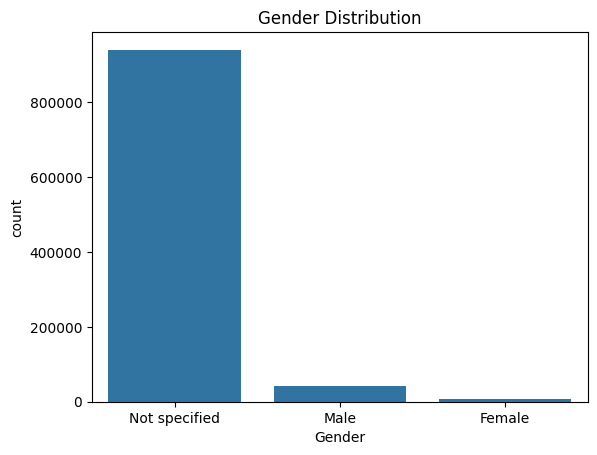

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Total Claims
sns.histplot(df['TotalClaims'], kde=True)
plt.title('Distribution of Total Claims')
plt.show()

# Count of Genders
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()


# Bivariate & Multivariate Analysis

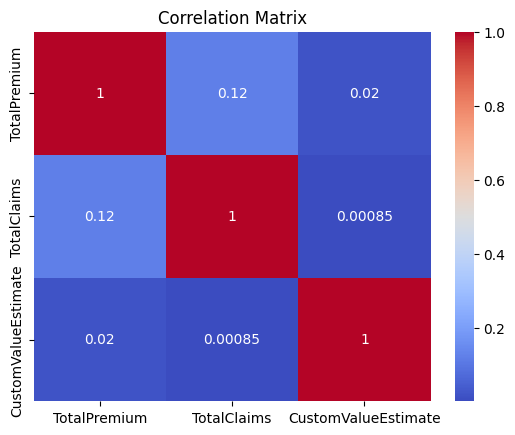

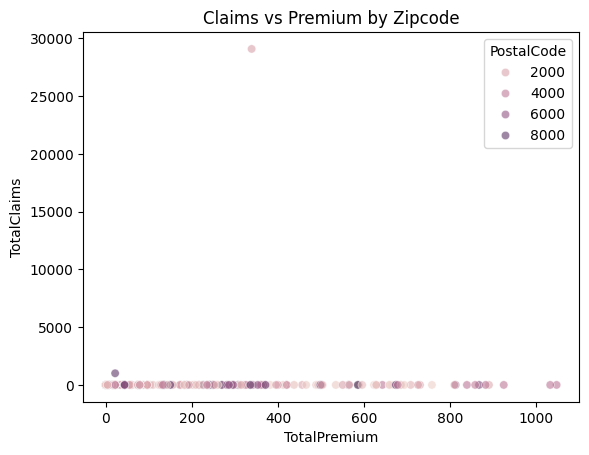

In [7]:
# Correlation matrix
numeric_cols = ['TotalPremium', 'TotalClaims', 'CustomValueEstimate']
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Claims vs Premium scatter (sample for performance)
sample_df = df.sample(1000, random_state=42)
sns.scatterplot(x='TotalPremium', y='TotalClaims', hue='PostalCode', data=sample_df, alpha=0.6)
plt.title('Claims vs Premium by Zipcode')
plt.show()


# Trends Over Geography

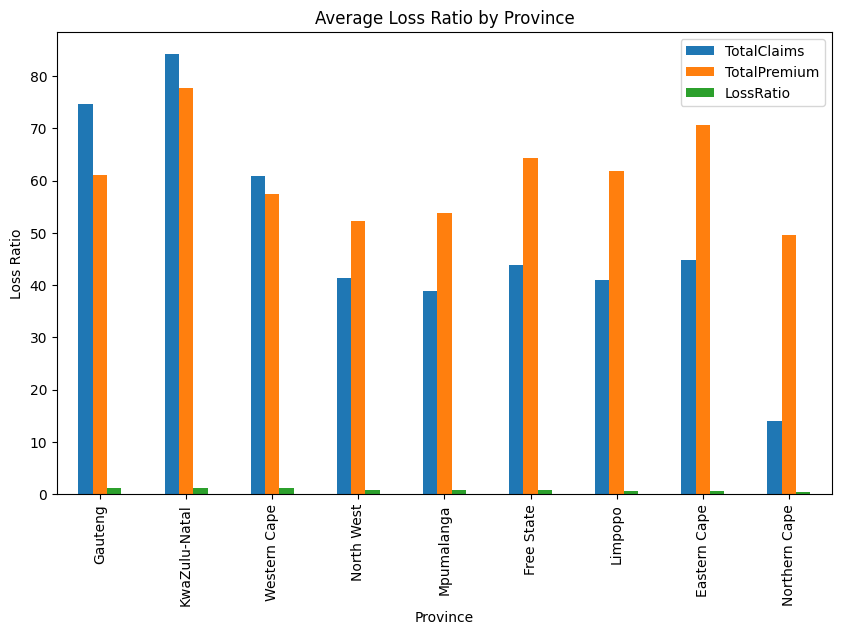

In [8]:
# Province-level loss ratio
province_group = df.groupby('Province')[['TotalClaims', 'TotalPremium']].mean()
province_group['LossRatio'] = province_group['TotalClaims'] / province_group['TotalPremium']
province_group.sort_values('LossRatio', ascending=False).plot(kind='bar', figsize=(10,6))
plt.title('Average Loss Ratio by Province')
plt.ylabel('Loss Ratio')
plt.show()


# Temporal Analysis

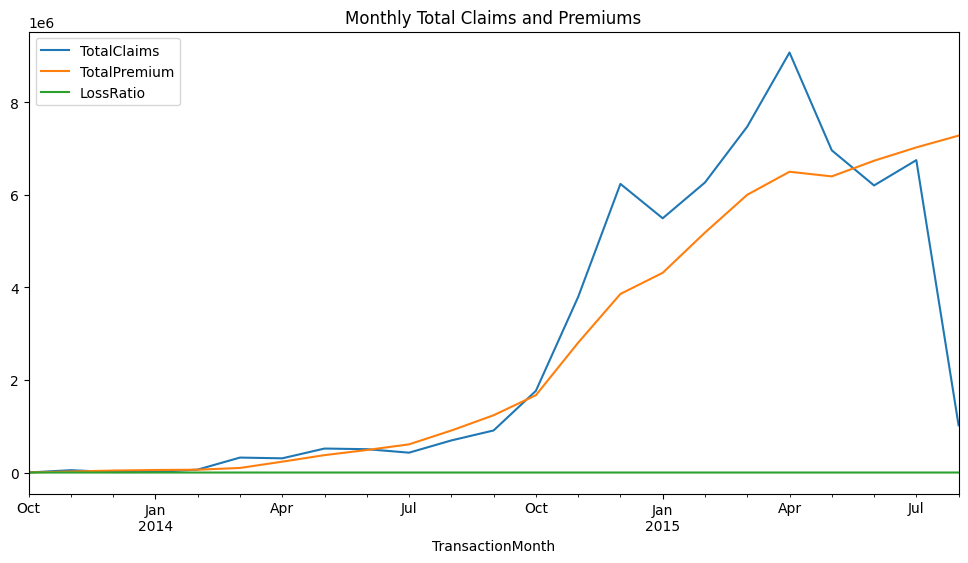

In [9]:
# Convert to datetime
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])

# Monthly trend
monthly = df.groupby(df['TransactionMonth'].dt.to_period('M')).agg({'TotalClaims': 'sum', 'TotalPremium': 'sum'})
monthly['LossRatio'] = monthly['TotalClaims'] / monthly['TotalPremium']

monthly.plot(figsize=(12,6), title='Monthly Total Claims and Premiums')
plt.show()


# Outlier Detection

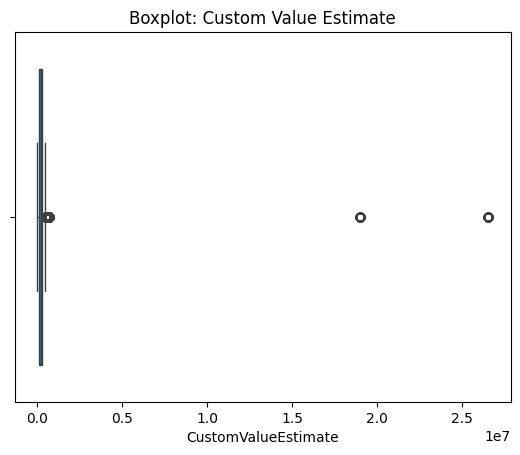

In [10]:
# Boxplot for outlier detection
sns.boxplot(x='CustomValueEstimate', data=df)
plt.title('Boxplot: Custom Value Estimate')
plt.show()


#  Insightful Visualizations

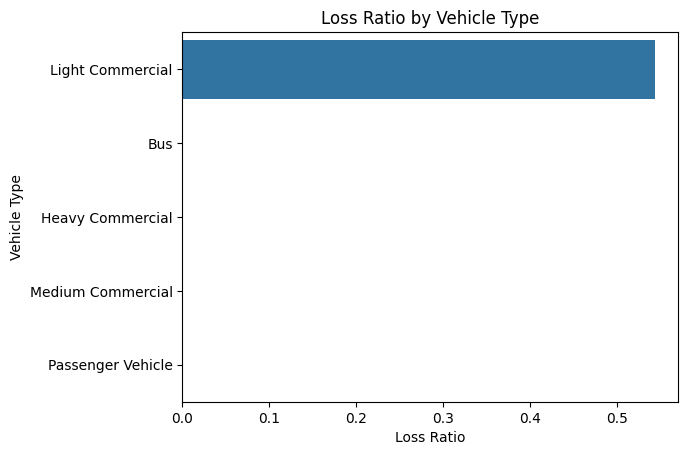

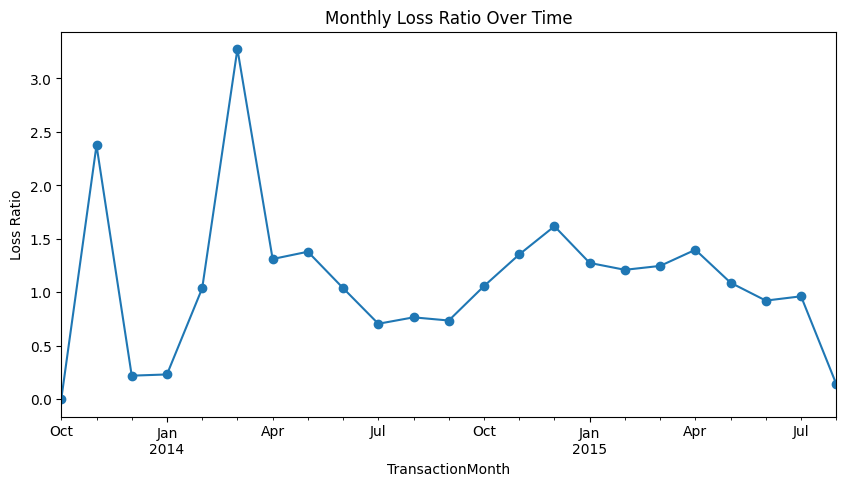

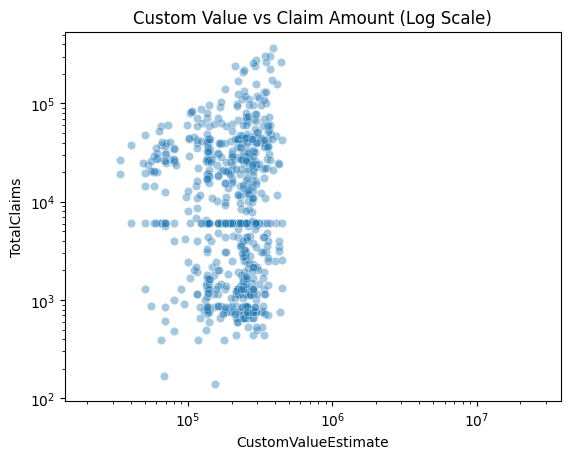

In [11]:
# Loss ratio by vehicle type
vehicle_group = df.groupby('VehicleType')['LossRatio'].mean().sort_values()
sns.barplot(x=vehicle_group.values, y=vehicle_group.index)
plt.title('Loss Ratio by Vehicle Type')
plt.xlabel('Loss Ratio')
plt.ylabel('Vehicle Type')
plt.show()

# monthly loss ratio over time
monthly['LossRatio'].plot(marker='o', figsize=(10,5))
plt.title('Monthly Loss Ratio Over Time')
plt.ylabel('Loss Ratio')
plt.show()

# custom value vs total claims
sns.scatterplot(x='CustomValueEstimate', y='TotalClaims', data=df, alpha=0.4)
plt.xscale('log')
plt.yscale('log')
plt.title('Custom Value vs Claim Amount (Log Scale)')
plt.show()
